 # Penguins Species Classification
 
 ### *Patrick Wang*

# Data Acquisition / Imports

To begin, we will import all the necessary packages and download the penguins dataset and make it look a little nicer/cleaner.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins = penguins[penguins['Sex'] != '.'] 
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Exploratory Analysis

Before we begin any actual modeling, we want to get familiarized with the dataset first. I'll create a few figures that displays some patterns and numbers to help aid our visualization and get a better understanding/grasp of the data.

## Figure 1: Summary Table

In [3]:
df = penguins.copy()

#select more important columns
columns = ["Species", "Sex", "Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

dv_1 = pd.DataFrame(df, columns = columns)
dv_1.groupby(["Species", "Sex"]).mean().round(2)

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex                                                                  
Adelie    FEMALE               37.26              17.62               187.79   
          MALE                 40.39              19.07               192.41   
Chinstrap FEMALE               46.57              17.59               191.74   
          MALE                 51.09              19.25               199.91   
Gentoo    FEMALE               45.56              14.24               212.71   
          MALE                 49.47              15.72               221.54   

                  Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
Species   Sex                                                          
Adelie    FEMALE        3368.84               8.79             -25.79  
          MALE          4043.49               8.93             -25.83  
Chinstrap FEMALE        3527.21               9.25             -24.57  
          MALE          3938.97               9.46             -24.53  
Gentoo    FEMALE        4679.74               8.19             -26.20  
          MALE          5484.84               8.30             -26.17

For the first data visualization figure, I created a summary table that displays important selected columns of the penguins dataframe grouped by the `Species` and `Sex` column. By grouping the table like this, we can find noticeable patterns for each species easily. 

With these patterns in mind, we can design our machine learning models using these quantitative and qualitative features that come from this summary table.


For instance, some clear observations and patterns that we can see are:

- On average, **Gentoo** penguins tend to have the **largest** body mass and flipper length for both genders when compared to the other two species.

- Despite Gentoo penguins being the largest out of the three, the numbers suggests that they have the shortest culmen depth of the three species. 

- On average, **Adelie** penguins are the **smallest** penguins with regards to body mass, flipper length, and their culmen length.

Just from these surface-level observations, we can probably assume that `culmen depth` or `body mass` may be important quantitative variables we should keep a closer eye on.

## Figure 2: Scatterplots of Body Mass vs. Flipper Length

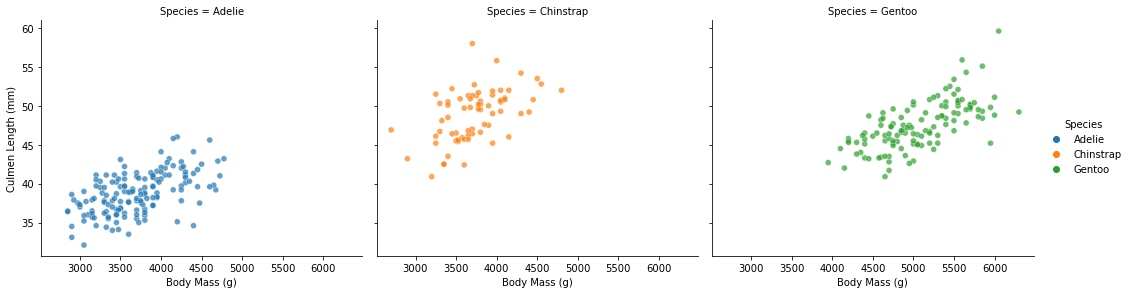

In [6]:
# use seaborn package to create row of graphs
fgrid = sns.relplot(data = df, x = 'Body Mass (g)', 
                    y = 'Culmen Length (mm)', 
                    hue = 'Species', col = 'Species', 
                    alpha = 0.7, aspect = 1.2, height = 4)


For the second data visualization figure, I decided to create a set of graphs that plots the body mass against culmen length for each species using the `Seaborn` package. 

From the previous summary table, I found strong patterns between these two variables and so, I created these plots to further validate those observations. 

These graphs show an even clearer pattern between these two quantitative varibles and suggests that on average, Adelie penguins are the smallest penguins and Gentoo penguins are the largest penguins with regards to both body mass and culmen length.

## Figure 3: Histogram of Culmen Depth

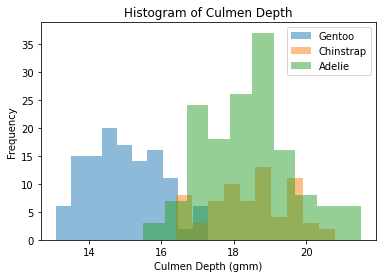

In [5]:
fig, ax = plt.subplots(1)
ax.set(xlabel = 'Culmen Depth (gmm)', 
       ylabel = 'Frequency',
      title = 'Histogram of Culmen Depth')

specie = set(df['Species'])

for i in specie:
    distinct = df[df['Species'] == i]
    distinct = distinct['Culmen Depth (mm)'].dropna()
    ax.hist(distinct, label = i.split(' ')[0], alpha = 0.5)

ax.legend()

The third data visualization figure includes a  histogram of the culmen depth for each species. Doing this helps corroborate our findings from the histogram with the numbers shown on the summary table. 

From the summary table, I observed that most of the Gentoo penguins had smaller culmen depths on average. Using this histogram, we can see that most of the Gentoo penguin data points lie towards the lower spectrum of the culmen depths, which supports this observation. 

Culmen depth may be a strong indicator that differentiates Gentoo penguins from other species. Furthermore, Adelie and Chinstrap penguins have larger culmen depths on average.

# Data Cleaning

To begin the data preparation of our models, let's split our entire dataset into a training / testing sets to ensure that the data cleaning process doesn't affect our testing set. It is essential that we do **not** touch the testing set until we fully build and train our machine learning models first. 

Let's go for a 80/20% split. 

In [9]:
# Split the Dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(1111)
train, test = train_test_split(penguins, test_size = 0.2)

To clean the data, I created a function that encodes the qualitative variables `Sex, Island, Species` into integers for easier manipulation using the `LabelEncoder()` function found within the `preprocessing` package of `SciKit Learn`. 

In [10]:
# Data Clean / Create training and test data

def prep_penguins_data(data_df):
    """
    Changes variables to have values 0, 1, and 2
    
    Paramters:
    data_df: data frame
    
    Returns:
    variables' values is 0, 1, and 2
    """
    
    df = data_df.copy()
    le = preprocessing.LabelEncoder()
    
    #encodes each of the qualitative varibles into integers
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
       
    return(df, list(df.columns.values))

X_train, y_train = prep_penguins_data(train)
X_test,  y_test  = prep_penguins_data(test)

Now, if we look at a snippet of the training dataset, we can see that our qualitative variables: `Species, Island, Sex` are now converted into integers.

In [12]:
# encoded into 0, 1, 2

X_train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
303,PAL0910,84,2,Anvers,0,"Adult, 1 Egg Stage",N6A2,Yes,11/15/09,50.0,15.9,224.0,5350.0,1,8.20042,-26.39677,NaN
211,PAL0910,60,1,Anvers,1,"Adult, 1 Egg Stage",N95A2,Yes,11/21/09,45.6,19.4,194.0,3525.0,0,9.46985,-24.65786,NaN
66,PAL0809,67,0,Anvers,0,"Adult, 1 Egg Stage",N30A1,Yes,11/6/08,35.5,16.2,195.0,3350.0,0,8.56192,-25.95541,NaN
248,PAL0708,29,2,Anvers,0,"Adult, 1 Egg Stage",N47A1,Yes,11/29/07,48.2,14.3,210.0,4600.0,0,7.68870,-25.50811,NaN
138,PAL0910,139,0,Anvers,1,"Adult, 1 Egg Stage",N79A1,No,11/16/09,37.0,16.5,185.0,3400.0,0,8.61651,-26.07021,Nest never observed with full clutch.


## Correlation Matrix

Additionally, we want to determine which variables are less correlated with our target variable, `Species`, so that we can remove these unnecessary variables from the training/testing set. 

Using a correlation matrix outputs the correlation coefficient between each variable in our dataset.

<AxesSubplot:>

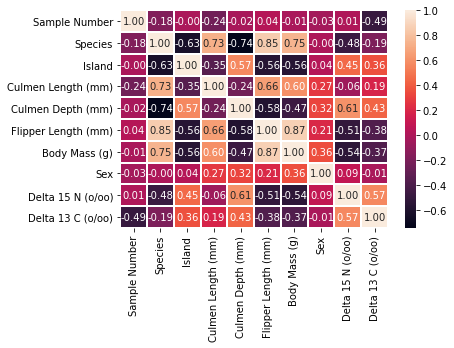

In [13]:
df1 = penguins.copy()

# changes the target variable to have values 0, 1, and 2
le = preprocessing.LabelEncoder()

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Species'] = le.fit_transform(df1['Species'])
df1['Island'] = le.fit_transform(df1['Island'])


# get correlation and draw heatmap
cor = df1.corr()
sns.heatmap(cor, linewidths = 1, annot = True, fmt = ".2f")


In [118]:
target = abs(cor['Species'])

In [119]:
# find which variables have very low correlation with 'species'
target[target < 0.5]

Sample Number        0.175852
Sex                  0.000621
Delta 15 N (o/oo)    0.475230
Delta 13 C (o/oo)    0.187846
Name: Species, dtype: float64

After deploying a correlation matrix, the results suggests that we should drop the variables: `Sample Number, Sex, Delta 15 N (o/oo), Delta 13 C (o/oo)` since they're the least correlated with our target variable, `Species`. 

Accordingly, our qualitative variable will be set to `Island` since `Sex` has been ruled out, leaving `Island` as the only qualitative variable left. 

We will determine our quantitative features later on when we create our models.

# Modelling

## 1. Logistic Regression

For the first machine learning model, I'll use a multinomial logistic regression model to predict a penguin's species given certain predictor variables. 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(multi_class = 'multinomial')

After importing necessary packages, I'll split up the predictor variables ($X$) from the target variable ($y$) and also remove some rows that contain `NA` values. 

In [54]:
# split x and y-variables without sex, delta 15N, delta 13C

# drop na 
X_train = X_train[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Species", "Island"]].dropna()

X_test = X_test[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)",  "Species", "Island"]].dropna()

X_train1 = X_train.drop(["Species"], axis = 1)
y_train1 = X_train[['Species']]

X_test1 = X_test.drop(["Species"], axis = 1)
y_test1 = X_test[['Species']]

## Feature Selection

Now, to determine which predictor variables we should apply to our training/testing set, I'll create a function `combo_scores()` that systematically calculates the cross-validation score of each combination of predictor variables to determine the most accurate features to use.

In [55]:
# systematic feature selection 

def combos_score(cols, model, x, y):
    """
    Function that calculates and returns the CV score of each possible combination of selected columns 
    
    Paramters:
    cols: selected columns
    model: desired model with parameters
    x: x training set
    y: y training set
    
    Returns:
    returns the CV score of each combo using our LR model
    """
    
    print("Training our model with these columns: " + str(cols))
    return cross_val_score(model, x[cols], y, cv = 5).mean()

In [56]:
#list out all possible combinations of columns from our x-train set
combos = [['Island', 'Body Mass (g)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]

#check the scores for each combination
for combo in combos:
    x = combos_score(combo, model = LR, x = X_train1, y = y_train1)
    print("CV score = "+ str(np.round(x,3)))

Training our model with these columns: ['Island', 'Body Mass (g)', 'Flipper Length (mm)']
CV score = 0.702
Training our model with these columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score = 0.897
Training our model with these columns: ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
CV score = 0.831
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score = 0.787
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score = 0.816
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']
CV score = 0.971


Through the automated feature selection, the combination with the highest cross-validation score of **0.971** is `Island, Culmen Depth (mm), Culmen Length (mm)`. 

We will use these as our qualitative and quantitative variables for the logistic regression model.

In [57]:
# set these variables for our x-training set
best_cols = ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']

## Cross Validation

In order to ensure that the model achieves the best performance, we need to ensure that it doesn't overfit the training set. To do so, I will use cross-validation to find the best/optimal complexity parameter or c-value in this case, of the model.

In [58]:
# best c and best score

best_score = -np.inf
cc = np.linspace(0.05, 1, 10)

for c in cc:
    T = LogisticRegression(C = c)
    scores = cross_val_score(T, X_train1[best_cols], 
                             y_train1, cv = 5).mean()
    
    if scores > best_score:
        best_c = c
        best_score = scores
        
best_c, best_score

(0.788888888888889, 0.9742087542087543)

Now that we have determined our optimal features and complexity parameter **(0.7888)**, we are ready to fit these into the logistic regrssion model and into the testing set.

## Model Fitting

In [59]:
# set LR model with the best_c calculated from previous code
LR = LogisticRegression(C = best_c)

In [60]:
# Model Score

LR.fit(X_train1[best_cols], y_train1)

print('Accuracy on the training set: {:.5f}'.format(LR.score(X_train1[best_cols],y_train1)))
print('Accuracy on the test set: {:.5f}'.format(LR.score(X_test1[best_cols],y_test1)))

Accuracy on the training set: 0.97794
Accuracy on the test set: 0.98551


After fitting the transformed data into the model, the score resulted in a **98.55%** accuracy on our test set. This is a very good sign and suggests that the logistic regression model is pretty powerful/accurate in predicting penguin species from unseen data using only 3 variables. 

## Confusion Matrix

In [126]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred1 = LR.predict(X_test1[best_cols])
confusion_matrix(y_test1, y_test_pred1)

array([[34,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 24]], dtype=int64)

To assess our model's predictive performance, I utilized a confusion matrix. A confusion matrix shows the number of times the model predicts a value against its actual true value. 

In this matrix, we see that there is only 1 misspecification on the (2nd row, 1st column) entry of the array. In other words, our LR model incorrectly predicted a penguin's species on the testing set only once, which is really good.

## Decision Region

To further evaluate the model's performance, I'll create a decision region function, `decision_region()` that shows how the specified model "classifies" each data point and makes a prediction afterwards using the best qualitative / quantitative variables. 

The plots will also contain a color-coded legend to differentiate the three species. 

In [64]:
# Decision Region
import matplotlib.patches as mpatches

def decision_region(c,X,y):
    """
    Plot decision region for each model with a color-coded legend
    
    Parameters:
    c: model
    X: predictor variables
    y: target variable
    
    Returns:
    decision region plot 
    """
    
    # fit model
    c.fit(X, y)
    
    # add color coding for legend
    color = ["red", "green", "blue"]
    species = np.array(["Adelie", "Chinstrap", "Gentoo"])
    color_arr = np.array(['blue', 'green', 'red'])
    

    # Create a dictionary according to the island
    s = {}
    for island_name in penguins["Island"].unique():
        s[island_name] = penguins[penguins["Island"] == island_name]

    # draw plots according to the different islands
    for i in s.keys():
        df = s[i]
        x0 = df['Culmen Length (mm)']
        x1 = df['Culmen Depth (mm)']
        y  = df['label']
        
        # attempt to predict at all these points
        grid_x = np.linspace(x0.min(), x0.max(), 501)
        grid_y = np.linspace(x1.min(), x1.max(), 501)
        xx, yy = np.meshgrid(grid_x, grid_y)
    
        XY = np.c_[xx.ravel(), yy.ravel()]
        
        # make predictions
        p = c.predict(XY)
        
        # reshape p back into a 2d array
        p = p.reshape(xx.shape)
    
        fig, ax = plt.subplots(1)
        
        # plots the decision boundaries
        ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
        
        # plots the points
        ax.scatter(x0, x1, c = color_arr[y], cmap = "jet")
        
        red = mpatches.Patch(color = 'blue', label = 'Adelie')
        blue = mpatches.Patch(color = 'green', label = 'Chinstrap')
        green = mpatches.Patch(color = 'red', label = 'Gentoo')
        ax.legend(handles = [red,blue,green])
        
        # labeling our axis
        ax.set(xlabel = "Culmen Length (mm)",
               ylabel = "Culmen Depth (mm)",
               title = "Island = " + i)
        
    plt.legend(handles = [red,blue,green])

In [65]:
# changes the target variable to have values 0, 1, and 2
le = preprocessing.LabelEncoder()
penguins['label'] = le.fit_transform(penguins['Species'])


# only need to drop the NAs in the columns we are using
penguins = penguins.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)'])
X = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = penguins['label']

### Logistic Regression Decision Region:

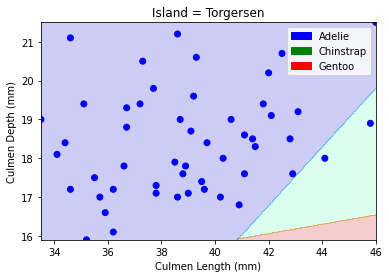

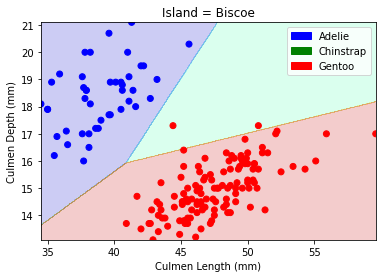

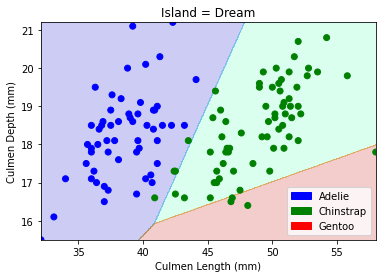

In [66]:
decision_region(LR,X,y)

From the decision region plot, we can see that the logistic regression model misclassified several penguins on each island. For instance, on `Torgersen`, there should be only `Adelie` penguins living on that island, but a few of were misspecified as Chinstraps. Similarly, on `Biscoe`, there were two `Gentoo` penguins that were misclassified as Chinstraps. From the last plot on `Dream`, we can see that some Chinstrap penguins were incorrectly classified as shown by a couple Chinstraps being misspecified as Adelie or Gentoo.

## Short Discussion 

The prediction score of the logistic regression model is within my expectations. The 98.55% prediction score of is very good and shows that it accurately predicts the species of penguins on unseen testing data. The confusion matrix only shows 1 misspecification, which suggests that the model had very little error in its predictions.

Despite the LR model's high prediction score, it still has a few drawbacks. A big disadvantage of the LR model is its overall simplicity. As shown in the decision region plot, because the boundaries are linear, it becomes more prone to misspecifications. 

For instance, the decision region for Island `Dream` resulted in a couple of misspecifications that could have been avoided if the LR model was more complex and had non-linear decision boundaries.

## 2. K-Nearest Neighbors (KNN)

For the second machine learning model, I'll use the K-Nearest Neighbors (KNN) Classifier model with 5 clusters to start.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

Once again, I will split up the predictor variables ($X$) from the target variable ($y$) `Species`, and also drop any `NA` values.

In [45]:
# split the x and y-variables 

X_train_k = X_train[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Species", "Island"]].dropna()

X_test_k = X_test[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Species", "Island"]].dropna()

X_train2 = X_train_k.drop(["Species"], axis = 1)
y_train2 = X_train_k[['Species']]

X_test2 = X_test_k.drop(["Species"], axis = 1)
y_test2 = X_test_k[['Species']]

After splitting up the variables, lets determine the best features to use for in the KNN model.

## Feature Selection

I'll use the previous `combo_scores()` function to determine the best features for this model. 

In [61]:
#list out all possible combinations of predictors
combos = [['Island', 'Body Mass (g)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]


#check score for each combo
for combo in combos:
    x = combos_score(combo, model = knn, x = X_train2, y = y_train2)
    print("CV score = "+ str(np.round(x,3)))

Training our model with these columns: ['Island', 'Body Mass (g)', 'Flipper Length (mm)']
CV score = 0.706
Training our model with these columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score = 0.956
Training our model with these columns: ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
CV score = 0.772
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score = 0.688
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score = 0.794
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']
CV score = 0.971


As we can see from the outputs, the highest CV score combination of predictor variables is once again: `Island, Culmen Depth, Culmen Length` with **0.971** score. I will use these variables as the predictors to fit into the KNN model.

In [62]:
# save this combination of predictors
best_cols = ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']

## Cross Validation

To prevent overfitting of our training set, we need to cross-validate to find the optimal complexity parameter. I will use cross-validation to find the best `n_neighbors` value of the KNN model.

In [63]:
# best k and best score
best_score = -np.inf

for k in range(1,40):
    
    T = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(T, X_train2[best_cols], y_train2, cv = 5).mean()

    if scores > best_score:
        best_k = k
        best_score = scores
    
best_k, best_score

(3, 0.977979797979798)

Let's apply the optimal parameter **(k = 3)** and features into our KNN model and fit the model into the unseen testing set.

## Model Fitting

In [135]:
# using knn with calculated best k-value
knn = KNeighborsClassifier(n_neighbors = best_k)

In [136]:
# Model Score

knn.fit(X_train2[best_cols], y_train2)
print('Accuracy on the training set: {:.3f}'.format(knn.score(X_train2[best_cols], y_train2)))
print('Accuracy on the test set: {:.3f}'.format(knn.score(X_test2[best_cols], y_test2)))

Accuracy on the training set: 0.985
Accuracy on the test set: 0.957


Our KNN model resulted in a score of **95.7%** accuracy on the testing set. While not as strong as the Logistic Regression model, but still pretty good nonetheless.

## Confusion Matrix

In [137]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred2 = knn.predict(X_test2[best_cols])
confusion_matrix(y_test2, y_test_pred2)

array([[33,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 23]], dtype=int64)

Similar to before, let's use a confusion matrix to assess model performance. From this matrix, we can observe that there were a total of 3 misspecifications. 

Overall, the KNN model resulted in a few more errors than the LR model, so as of now, we can assume that it performs a bit worse than the LR model.

## Decision Region

We will use our function that plotted the decision regions of the model from before to further evaluate our KNN model's performance and it's "decision-making" abilities.

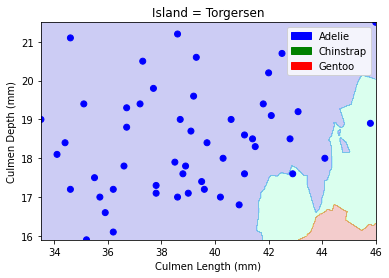

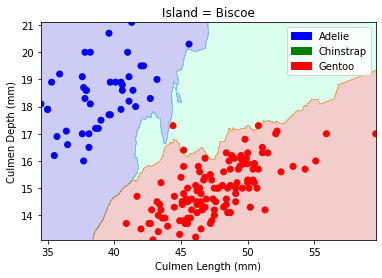

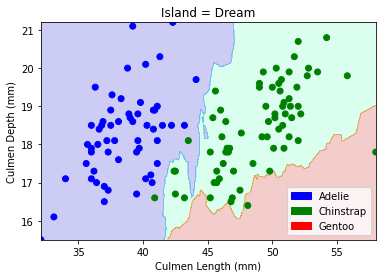

In [67]:
# Decision region
decision_region(knn, X, y)

As we can see here, the decision region plots shows that our KNN model did make a few misspecifications when classifying a penguin's species, but not very much. For example, on Torgersen, two Adelie penguins were incorrectly decided as Chinstrap penguins. On Biscoe, only one Gentoo penguin was incorrectly decided as an Adelie. And on Dream, some Chinstrap penguins were incorrectly classified as an Adelie or Gentoo. 

## Short Discussion

The prediction score of the KNN model is **95.7%**, which is a very high prediction score, but not as high as the Logistic Regression model. According to the results of the confusion matrix, 3 penguins were misspecified. 

However, the decision regions for the KNN model actually performed better than the LR model. The KNN had less misspecifications for `Biscoe` and `Dream` in comparison to the decision regions for the LR model. This was most likely due to the KNN's nonlinear nature and thus, the non-linear decision boundaries of the KNN.

There are a couple of pitfalls with the KNN model. An obvious shortcoming of the KNN model is that it takes up a lot of memory at runtime, which decrease overall speed when training and fitting the data.

## 3. Random Forest

For the third and last machine learning model, I'll create a Random Forest model to predict a penguin's species given various predictor variables.

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators = 26, random_state = 0)

First, we will split our predictors ($X$) and our target variable ($y$) apart and remove any `NA` values just like before. 

In [70]:
X_train_r = X_train[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Species", "Island"]].dropna()

X_test_r = X_test[["Culmen Length (mm)", 
           "Culmen Depth (mm)", "Flipper Length (mm)", 
           "Body Mass (g)", "Species", "Island"]].dropna()

X_train4 = X_train_r.drop(["Species"], axis = 1)
y_train4 = X_train_r[['Species']]

X_test4 = X_test_r.drop(["Species"], axis = 1)
y_test4 = X_test_r[['Species']]

Before we train our model, we want to determine the best features or predictors to use in our random forest model as usual.

## Feature Selection

In [71]:
#list out possible combos of predictors
combos = [['Island', 'Body Mass (g)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Body Mass (g)', 'Culmen Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']]

#check score for each combo
for combo in combos:
    x = combos_score(combo, model = clf2, x = X_train4, y = y_train4)
    print("CV score = "+ str(np.round(x,3)))

Training our model with these columns: ['Island', 'Body Mass (g)', 'Flipper Length (mm)']
CV score = 0.853
Training our model with these columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score = 0.978
Training our model with these columns: ['Island', 'Body Mass (g)', 'Culmen Length (mm)']
CV score = 0.974
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score = 0.809
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score = 0.842
Training our model with these columns: ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']
CV score = 0.982


The highest CV score combination of predictor variables is once again: `Island, Culmen Depth, Culmen Length`. 

By now, it seems that for all models, these 3 predictors are the strongest features to use.

In [72]:
# set this combination as our predictors
best_cols = ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']

## Cross Validation

Let's use cross-validation to find the best complexity parameter or `n_estimators` in this case, of the model. 

In [73]:
# best n and best score
best_score = -np.inf

for n in range(52, 200, 87):
    
    T = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(T, X_train4[best_cols], y_train4, cv = 5).mean()
    
    if scores > best_score:
        best_n = n
        best_score = scores
        
best_n, best_score

(139, 0.9852525252525253)

With our optimal complexity parameter **(n = 139)** and best features selected, we can now fit the model into our unseen testing set.

## Model Fitting

In [146]:
# apply the best-n value into our random forest model
clf2 = RandomForestClassifier(n_estimators = best_n)

In [74]:
# model score

clf2.fit(X_train4[best_cols], y_train4)
print('Accuracy on the training set: {:.3f}'.format(clf2.score(X_train4[best_cols],y_train4)))
print('Accuracy on the test set: {:.5f}'.format(clf2.score(X_test4[best_cols],y_test4)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.98551


The Random Forest model resulted in a score of **98.55%**, which is the same as the Logistic Regression model and better than the KNN model. 

## Confusion Matrix

In [148]:
# Confusion matrix

y_test_pred4 = clf2.predict(X_test4[best_cols])
confusion_matrix(y_test4, y_test_pred4)

array([[33,  0,  1],
       [ 0, 11,  0],
       [ 0,  0, 24]], dtype=int64)

Using a confusion matrix to assess our model's predictive performance, we can see that there is only 1 misspecification on the [0,2] entry of the array. This model is accurate and did not make many errors. It's better than the KNN model, and is similar in strength to the LR model.

## Decision Region

Let's look at the decision regions of this model to evaluate its ability to classify data points and make predictions.

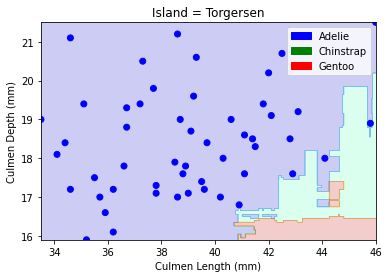

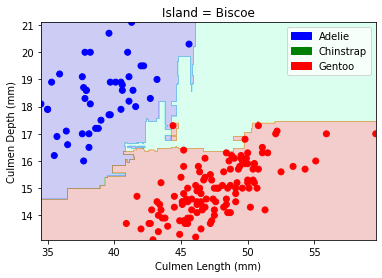

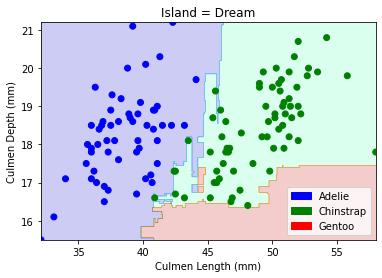

In [75]:
# Decision region
decision_region(clf2, X, y)

From the decision region plots, the Random Forest model appears to be the most complex out of the three models and resulted in the least misclassifications. 

There were no species misspecifications on any island, suggesting that it performed the best in classifying a large set of data points.

## Short Discussion

The Random Forest model got a prediction score of **98.55%**, which is the same as the LR model, but better than the KNN. According to the confusion matrix, only one penguin was misidentified. The accuracy of the Random Forest model in the decision regions is the highest of the three models, which was mostly like due to its inherent complexity as a model. 

However, despite being very accurate with little to no errors, there are some drawbacks of this model. The model's high complexity is both an advantage and a disadvantage. As we can see from the decision regions, it has the most complicated decision boundaries and therefore, performed the best in that area. However, because the model is more complex, the computation speed is much slower.

# Final Discussion



Overall, all models achieved an **over 95%** accuracy score, suggesting that their predictive power on unseen data is very good. From the results of all of the confusion matrices and decision regions, the Random Forest model performed the best. Especially in the decision regions, the **Random Forest** model correctly classified **every single** penguin on each island.

The LR model performed really well in its high predictive score and strong confusion matrix. However, it performed the worst in creating the decision regions due to its level of simplicity and linear boundaries. This makes it better than the KNN model in predictive power, but a bit worst than the Random Forest model in classification.

The KNN model performed the worst amongst the three models. The high computational complexity of the KNN model and the large number of hyperparameters are just a couple of factors that negatively impacted its results. 

Out of the three machine learning models I implemented, it seems that the Random Forest model is the strongest. It performed very similarly to the LR model in predictive power, but much better in the decision regions, making it a better choice than the LR for classification. 

All in all, to accurately classify a penguin species, I recommend using a Random Forest model with `Island, Culmen Depth, Culmen Length` as the predictor variables. 